In [163]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
# import tensorflow_datasets as tfds

In [164]:
import pathlib
# dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# data_dir = tf.keras.utils.get_file(origin=dataset_url, 
#                                    fname='flower_photos', 
#                                    untar=True)
data_dir = pathlib.Path("C:/Users/user/.keras/datasets/flower_photos")
print(data_dir)

C:\Users\user\.keras\datasets\flower_photos


3670


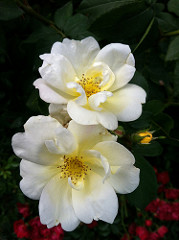

In [165]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

In [166]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

print(train_ds)

train_ds = train_ds.unbatch()

img = []
lab = []

for images, labels in train_ds:
#     print(images.numpy().shape)
    img.append(images.numpy().astype("uint8"))
    lab.append(labels.numpy().astype("uint8"))


img = np.array(img, dtype="uint8")
lab = np.array(lab, dtype="uint8")
print(img.shape)


# np.load(path)

# print(img.shape)
# plt.imshow(img[433])

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>
(2936, 180, 180, 3)


In [167]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = val_ds.unbatch()
img2 = []
lab2 = []

for images, labels in val_ds:
#     print(images.numpy().shape)
    img2.append(images.numpy().astype("uint8"))
    lab2.append(labels.numpy().astype("uint8"))


img2 = np.array(img2, dtype="uint8")
lab2 = np.array(lab2, dtype="uint8")
print(img2.shape)
np.savez_compressed('tt/com.npz', train_img=img, train_lab=lab, test_img=img2, test_lab=lab2)


Found 3670 files belonging to 5 classes.
Using 734 files for validation.
(734, 180, 180, 3)


In [21]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
